# Ev.6:- Loan Application Status Prediction

In [1]:
# For importing neccessary libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file:-
data=pd.read_csv("loan_prediction.csv")

In [3]:
# .head used for fetching first five rows of the dataset:- 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EXPLORATORY DATA ANALYSIS(EDA):-

In [4]:
# For checking how many rows and columns are there in dataset.
data.shape

(614, 13)

In this, there are 614 rows and 13 columns present in the dataset.

In [5]:
# For checking the available columns in the dataset.
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In this, the column Loan_ID has a significant role in the approval process of loans as it will help in identification purposes.

In [6]:
# For checking the Null values in the dataset:-
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As seen above, there are 6 columns which are not having any null values from the list of available columns.

In [7]:
# For checking the datatypes of each columns:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here, the Target column Loan_Status has object datatype.

In [8]:
# For checking the information of the dataset:-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# For checking the unique values in the dataset:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

As seen above, the column Loan_ID has maximum number of unique values in the dataset.

In [11]:
# For Checking value count of all columns present in the dataset:-
for i in data.columns:
    print(data[i].value_counts())
    print("----")
    print("----")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
----
----
Male      489
Female    112
Name: Gender, dtype: int64
----
----
Yes    398
No     213
Name: Married, dtype: int64
----
----
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----
----
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----
----
No     500
Yes     82
Name: Self_Employed, dtype: int64
----
----
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
----
----
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
----
----
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12

In this,as seen that all the values present in the Loan ID column are Unique, which is required further for analysis,
And one more column named Coapplicant Income having 273 rows with 0.0 values, we have to fix that as well, else it will affect in our model accuracy.

In [13]:
# For dropping the Loan ID column which is not required for further anaylsis:-
data.drop(["Loan_ID"],axis=1,inplace=True)

In [15]:
# For checking the statistical summary of the dataset:-
data.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In this, it is seen that high amount of outliers are present in ApplicantIncome,CoapplicantIncome, LoanAmount, Loan_Amount_Term.
also, there is skewness present in all the Numeric columns, and
Standard Deviation is high in ApplicantIncome, Coapplicant Income, LoanAmount and Loan_Amount_Term.

In [16]:
# For checking the skewness levels:-
data.skew()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_7828\1014732793.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In this, it is seen that skewness is present in all the columns listed above.

In [17]:
# For replacing values o in Co ApplicantIncome column with mean:-
data["CoapplicantIncome"].replace(0,data["CoapplicantIncome"].mean(),inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1621.245798,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1621.245798,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.000000,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1621.245798,187.0,360.0,1.0,Urban,Y


Here, all the 0 values has been replaced with the mean.

For fiiling Nan values :-

In [18]:
# For replacing NaN values in LoanAmount column with median:-
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())

In [20]:
#  For replacing NaN values in the reamining categorical columns with mode method:-
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"]=data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].mode()[0])
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])

In [21]:
# For checking Whether all NaN values has been removed or not?
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

It is seen above that all the values has been filled with their respective categories data.

# Performing Univariate Analysis:-

In [22]:
# For dividing Integer and Categorical columns in two different variables:-
Category=[]
Integer=[]
for i in data.dtypes.index:
    if data.dtypes[i]=="object":
        Category.append(i)
    else:
        Integer.append(i)
print(Category)
print(Integer)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In this, the data has been divided properly for better clarity ahead.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


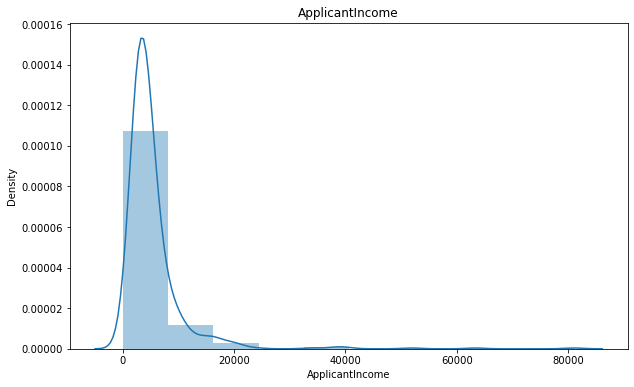

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


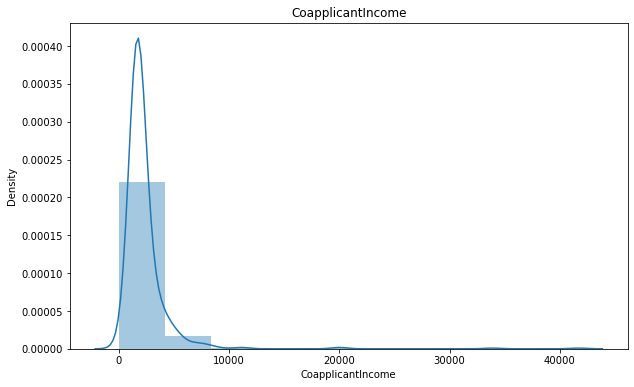

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


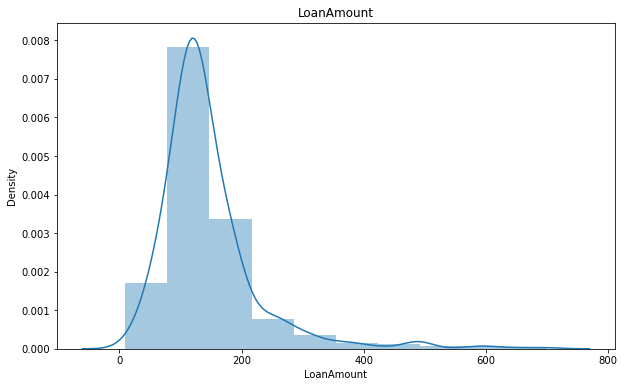

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


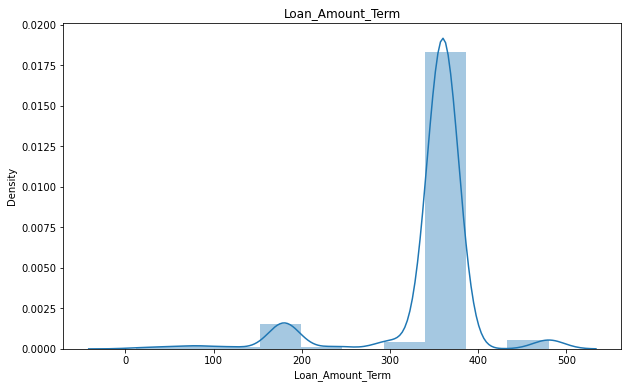

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


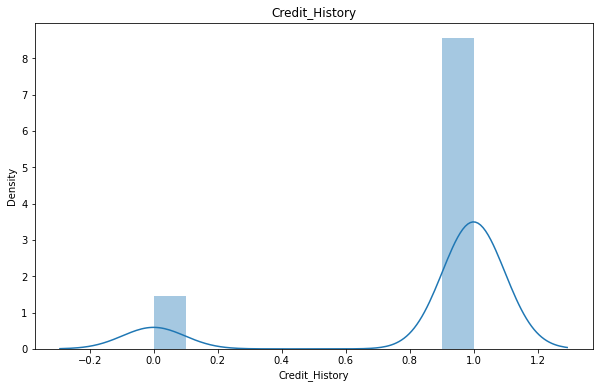

In [24]:
# For visualising  numerical columns using dist plot method:-
for i in data[Integer]:
    plt.figure(figsize=(10,6))
    sns.distplot(data[i], bins=10)
    plt.title(i)
    plt.show()

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


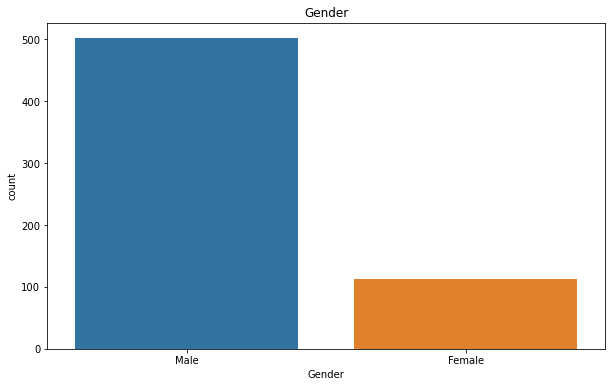

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


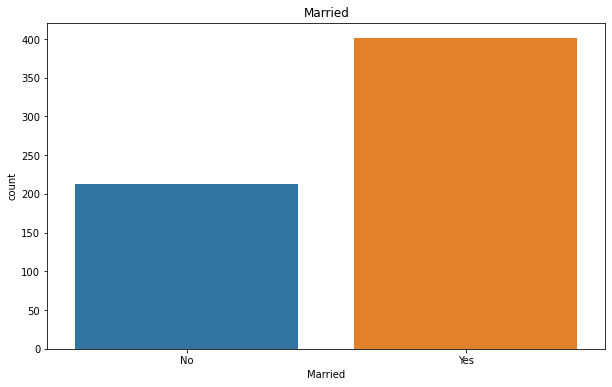

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


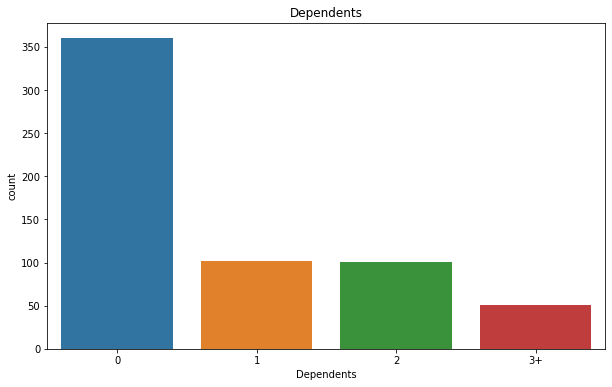

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


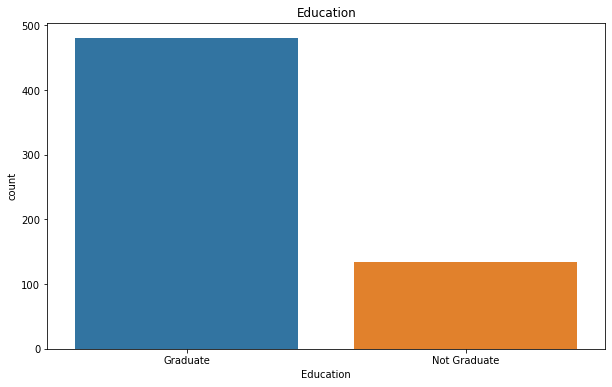

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


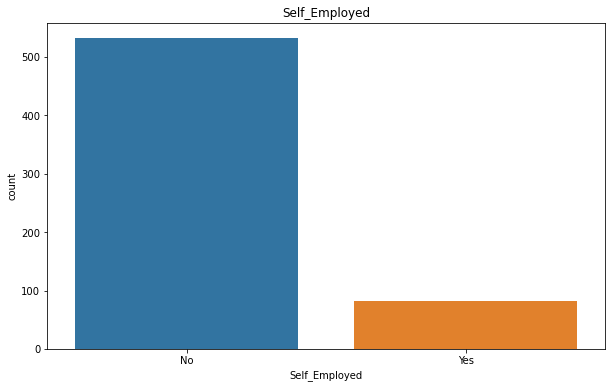

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


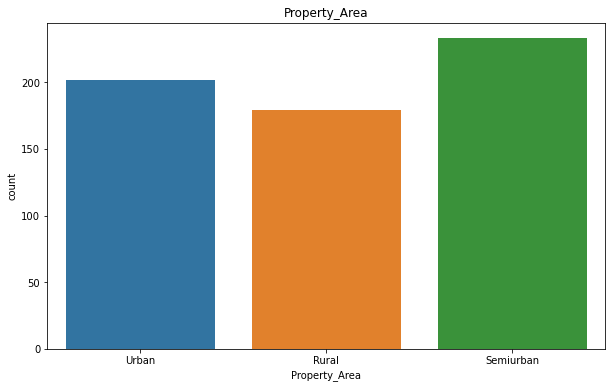

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


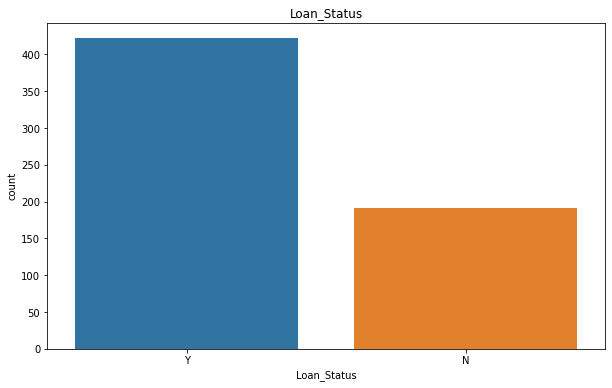

In [25]:
# For visualising categorical columns using countplot method:-
for i in data[Category]:
    plt.figure(figsize=(10,6))
    sns.countplot(data[i])
    plt.title(i)
    plt.show()

In Column Gender it is clearly seen that most of the applicants are Male.

In Column Married it is clearly seen that most of the applicants are Married.

In Dependents, it is clearly seen that most of the applicants have 0 dependents.

In Education column,it is clearly seen that most of the applicants are minimum Graduate.

In Self_Employed column, it is clearly seen that most of the applicants are salaried.

In Property_Area column, it is clearly seen that most of the properties are from semi urban than urban and last in Rural Areas.

In Target column Loan_Status, most of the applicants are eligible for taking loan.

# BiVariate Analysis:-

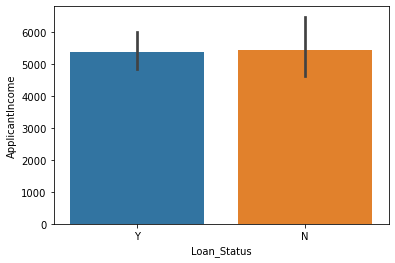

In [26]:
# For checking correlation of Target column with ApplicantIncome column:-
sns.barplot(x="Loan_Status",y="ApplicantIncome",data=data)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

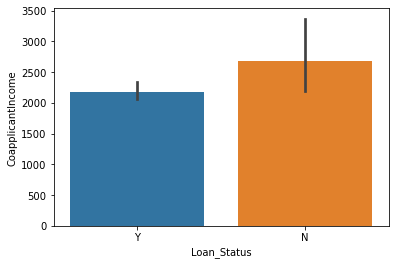

In [27]:
# For checking correlation of Target column with CoapplicantIncome:-
sns.barplot(x="Loan_Status",y="CoapplicantIncome",data=data)

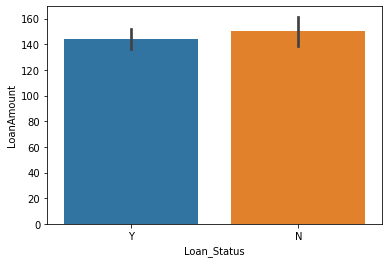

In [28]:
# For checking correlation of Target column  with LoanAmount:-
sns.barplot(x="Loan_Status",y="LoanAmount",data=data)
plt.show()

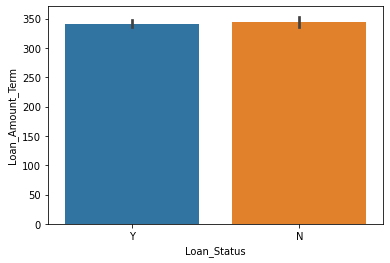

In [29]:
# For checking correlation of Target column  with Loan_Amount_Term:-
sns.barplot(x="Loan_Status",y="Loan_Amount_Term",data=data)
plt.show()

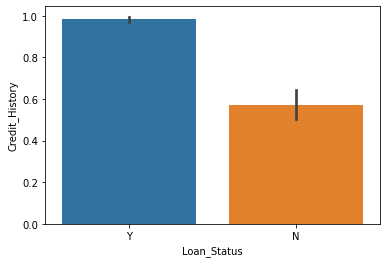

In [30]:
# For checking correlation of Target column  with Credit History:-
sns.barplot(x="Loan_Status",y="Credit_History",data=data)
plt.show()

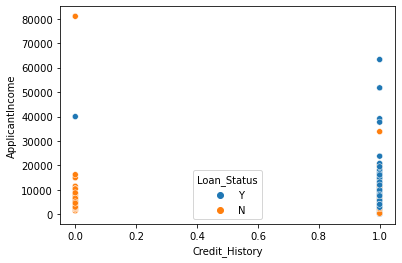

In [31]:
# For checking correlation of our Target column  with Credit History using another plotting method:-
sns.scatterplot(x="Credit_History",y="ApplicantIncome",hue="Loan_Status",data=data)
plt.show()

If the applicant is having better credit score, the loan approval will get easier.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

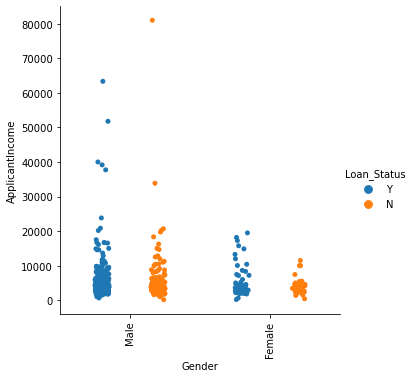

In [32]:
# For checking correlation between Gender with applicantIncome and with loan_status as hue using different method catplot:-
sns.catplot(x = "Gender", y = "ApplicantIncome", hue = "Loan_Status", data=data, split=True)
plt.xticks(rotation=90)

As seen, Males are getting loans more easier than Females.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


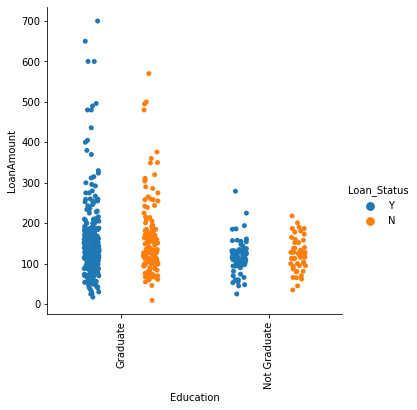

In [34]:
# For checking correlation between Education and loanAmount:-
sns.catplot(x = "Education", y = "LoanAmount", hue = "Loan_Status", data=data, split=True)
plt.xticks(rotation=90);

 In this, Graduates are getting loans more easier than Non-Graduates.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


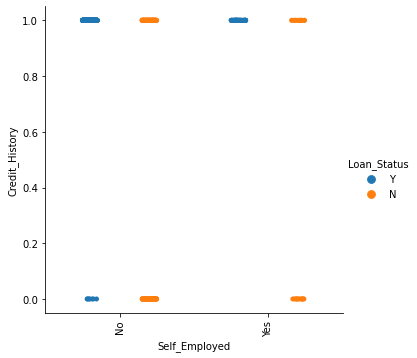

In [35]:
# For checking correlation between self Employed and Credit History:-
sns.catplot(x = "Self_Employed", y = "Credit_History", hue = "Loan_Status", data=data, split=True)
plt.xticks(rotation=90);

In this, the Self Employed people are not getting loans in a easier mode.

# Multi-Variate Analysis:-

In [37]:
# For checking correlation among multiple columns:-
corr=data.corr()

In [38]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.050734,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.050734,1.000000,0.206453,-0.073210,0.008339
LoanAmount,0.565181,0.206453,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.073210,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.008339,-0.000607,-0.004705,1.000000


Here, there is a positive correlation between ApplicantIncome and LoanAmount.

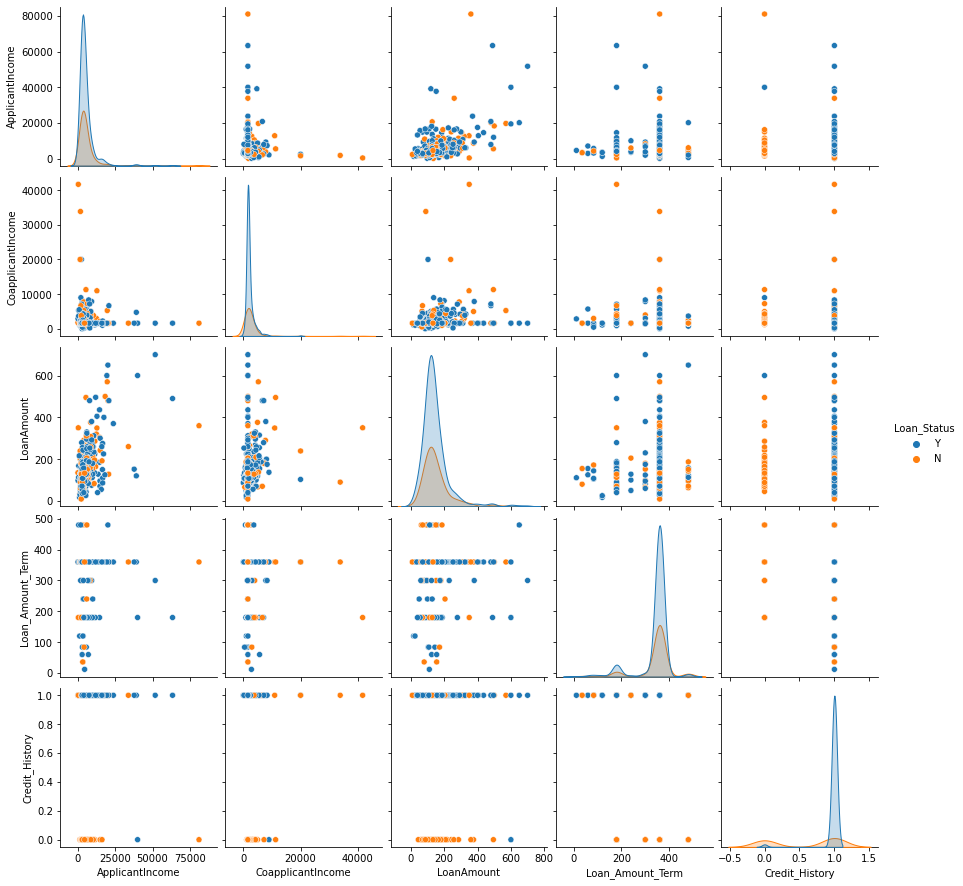

In [39]:
# For checking correlation between all the columns in dataset using pairplot method:
sns.pairplot(data,hue="Loan_Status")

# Removal of Outliers:-

<AxesSubplot:>

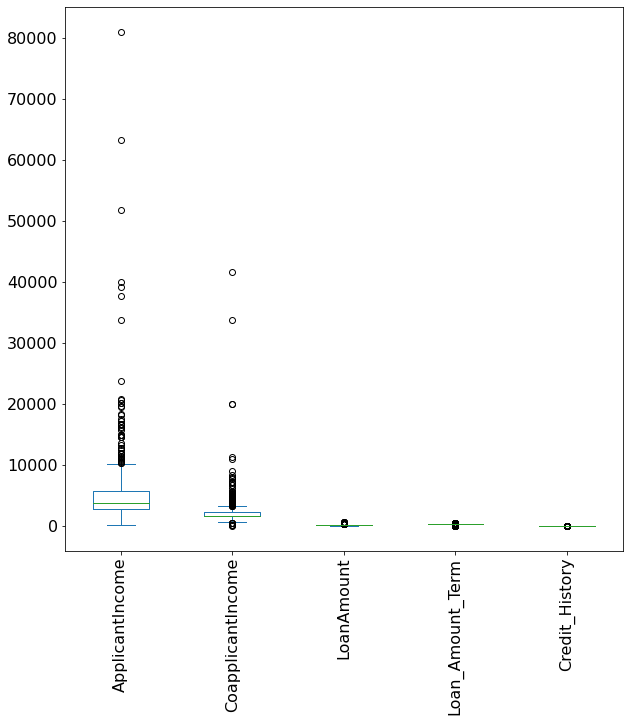

In [40]:
# For Checking outliers using boxplot method:
data.plot(kind="box", figsize=(10,10),fontsize=16, rot=90)

In this, there are huge outliers present in ApplicantIncome and CoapplicantIncome columns 
and some present in categorical columns which will not be removed as per parameters.

In [42]:
# For seperating outlier columns in a seperate list:-
outliers=data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]

In [43]:
# For importing required libraries for zscore:-
from scipy.stats import zscore
z=np.abs(zscore(outliers))
data1=data[(z<3).all(axis=1)]
data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1621.245798,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1621.245798,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.000000,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1621.245798,187.0,360.0,1.0,Urban,Y


In this, all the outliers has been removed.

In [44]:
# For reconfirmimg whether outliers has been removed or not:-
data1.shape

(589, 12)

In [45]:
# For Checking the Percentage of dataloss using zscore method:-
dataloss=(((data.shape[0]-data1.shape[0])/data.shape[0])*100)
dataloss

4.071661237785016

In [46]:
# For checking skewness levels in columns:-
data1.skew()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_7828\765779776.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()


ApplicantIncome      2.164762
CoapplicantIncome    2.554282
LoanAmount           1.114173
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

In [47]:
# For removing skewness using yeo-johnson method:-
# For importing required libraries:-
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method="yeo-johnson")
'''
parameters:
method='box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod='box_cox' or 'yeo-johnson'\n"

In [48]:
skewness=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [49]:
data1[skewness]=scaler.fit_transform(data1[skewness].values)

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_7828\2124408680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[skewness]=scaler.fit_transform(data1[skewness].values)


In [52]:
# For checking whether skewness is removed or not:
data1[skewness].skew()

ApplicantIncome      0.028063
CoapplicantIncome    0.202442
LoanAmount           0.061412
dtype: float64

As seen above, skewness has been removed properly.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

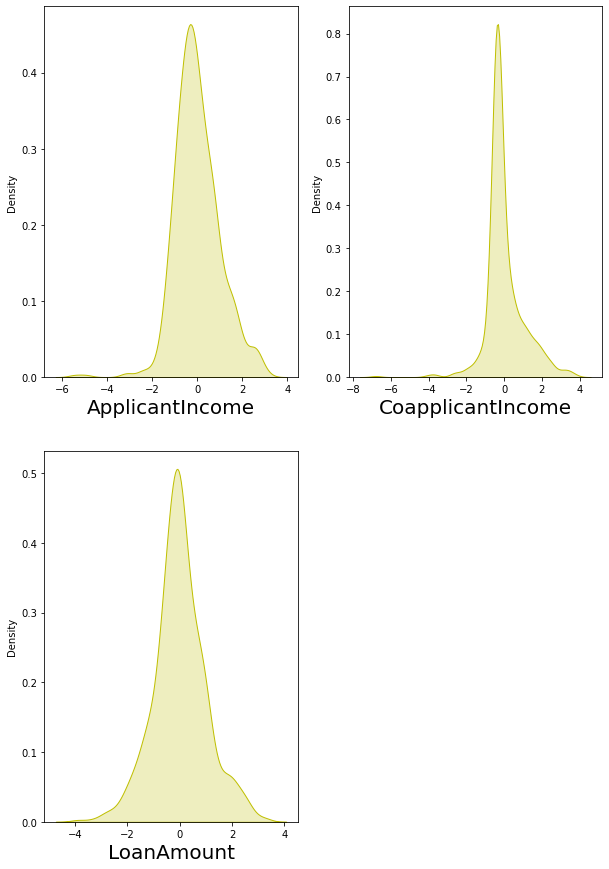

In [53]:
# For visualising the distribution of data in each column using dist plot method:-
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in data1[skewness]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data1[column],color='y',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Encoding Techniques:-

In [54]:
# For separating categorical columns in new dataset:-
Category1=[]
for i in data1.dtypes.index:
    if data1.dtypes[i]=='object':
        Category1.append(i)
print(Category1)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [55]:
# Importing required libraries:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1[Category1]=data1[Category1].apply(le.fit_transform)
data1[Category1].head()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_7828\4097474122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[Category1]=data1[Category1].apply(le.fit_transform)


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


As seen above, all categorical columns has been converted to numerical ones.

In [56]:
# For checking correlation in the new dataset:-
corr=data1.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.000841,0.058502,0.091815,0.157432,-0.084919,0.013432,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.004453,-0.022535,0.046542,0.173073,-0.100776,0.019377,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.055481,0.105559,-0.092968,0.128368,-0.091158,-0.017650,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.003507,-0.168924,-0.093711,-0.133962,-0.076546,-0.073799,-0.065623,-0.092852
Self_Employed,0.000841,-0.004453,0.055481,-0.003507,1.000000,0.215911,0.010388,0.105322,-0.053868,-0.012954,-0.030248,-0.016617
ApplicantIncome,0.058502,-0.022535,0.105559,-0.168924,0.215911,1.000000,-0.090870,0.436309,-0.041597,0.026989,-0.016277,-0.003320
CoapplicantIncome,0.091815,0.046542,-0.092968,-0.093711,0.010388,-0.090870,1.000000,0.311612,-0.048582,-0.041050,-0.079278,-0.026858
LoanAmount,0.157432,0.173073,0.128368,-0.133962,0.105322,0.436309,0.311612,1.000000,0.094441,-0.008701,-0.102290,-0.034886
Loan_Amount_Term,-0.084919,-0.100776,-0.091158,-0.076546,-0.053868,-0.041597,-0.048582,0.094441,1.000000,-0.013960,-0.070405,-0.023119
Credit_History,0.013432,0.019377,-0.017650,-0.073799,-0.012954,0.026989,-0.041050,-0.008701,-0.013960,1.000000,-0.005694,0.555908


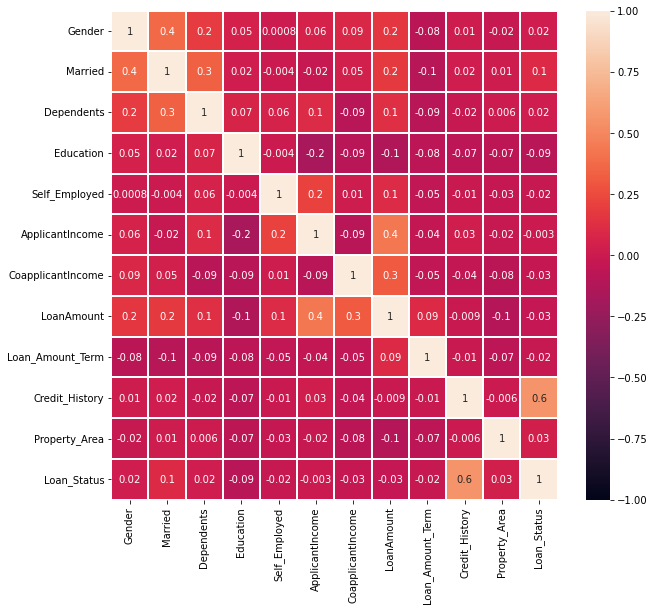

In [57]:
# For visualising correlation in all columns using heatmap method:-
plt.figure(figsize=(10,9))
sns.heatmap(data1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True,annot_kws={'size':10})
plt.yticks(rotation=0);

As seen above, the multicollinearity is not there in this.

# Data Scaling:-

In [58]:
# For assigning features to x and Target variable to y:-
x1=data1.drop("Loan_Status",axis=1)
y=data1["Loan_Status"]

In [59]:
# For importing required libraries:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

In [60]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.688986,-0.374510,0.003682,0.272306,0.41349,1.222929
1,0.476533,0.733389,0.276349,-0.542684,-0.384900,0.239843,-0.522855,0.003682,0.272306,0.41349,-1.313356
2,0.476533,0.733389,-0.728402,-0.542684,2.598076,-0.525799,-0.374510,-1.384802,0.272306,0.41349,1.222929
3,0.476533,0.733389,-0.728402,1.842694,-0.384900,-0.791841,0.424361,-0.148052,0.272306,0.41349,1.222929
4,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.736280,-0.374510,0.238407,0.272306,0.41349,1.222929


# Data Balancing:-

In [61]:
# For balancing the dataset using SMOTE technique :-
# For Checking the value_counts in y:-
y.value_counts()

1    407
0    182
Name: Loan_Status, dtype: int64

In [62]:
# Importing required libraries for oversampling method:-
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [63]:
# For checking the value count again for confirming that data is balanced or not:-
y.value_counts()

1    407
0    407
Name: Loan_Status, dtype: int64

# Finding the Best Random State:-

In [64]:
# For finding best random state and accuracy score:-
# For importing required libraries:-
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [65]:
Max_acc=0
Max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    Model = RandomForestClassifier()
    Model.fit(x_train, y_train)
    pred = Model.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Max_acc:
        Max_acc=acc
        Max_rs=i
print("Best accuracy is ",Max_acc," on Random_state ",Max_rs)

Best accuracy is  0.8872549019607843  on Random_state  163


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=163)

# Classification Model Building:-

In [67]:
# Importing all necessary libraries for the models:-
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

In [69]:
# For checking Accuracy score with 1st model: KNeighborsClassifier:
knn=KNN()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,prediction))
print("Confusion Matrix: ", confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

R2_Score:  0.7696078431372549
Confusion Matrix:  [[82 15]
 [32 75]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        97
           1       0.83      0.70      0.76       107

    accuracy                           0.77       204
   macro avg       0.78      0.77      0.77       204
weighted avg       0.78      0.77      0.77       204



In this, the accuracy score is 77%.

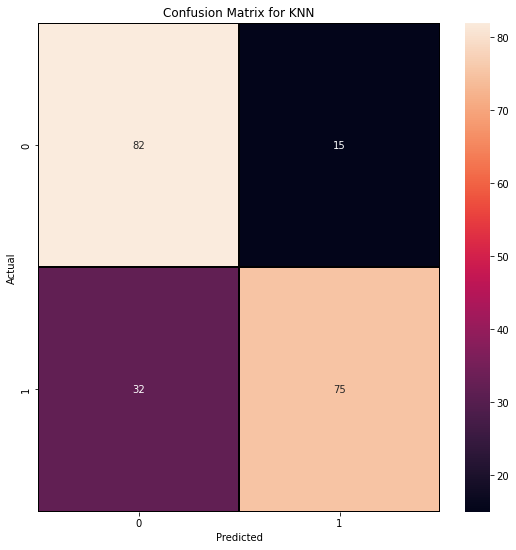

In [72]:
# For checking confusion matrix for KNN:-
CM= confusion_matrix(y_test,prediction)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")
plt.show()

In [74]:
# For checking Accuracy score with 2nd model: SupportVectorClassifier:
sv=SVC()
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predsv))
print("Confusion Matrix: ", confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

R2_Score:  0.7647058823529411
Confusion Matrix:  [[65 32]
 [16 91]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        97
           1       0.74      0.85      0.79       107

    accuracy                           0.76       204
   macro avg       0.77      0.76      0.76       204
weighted avg       0.77      0.76      0.76       204



Here, the accuracy score is coming 77%

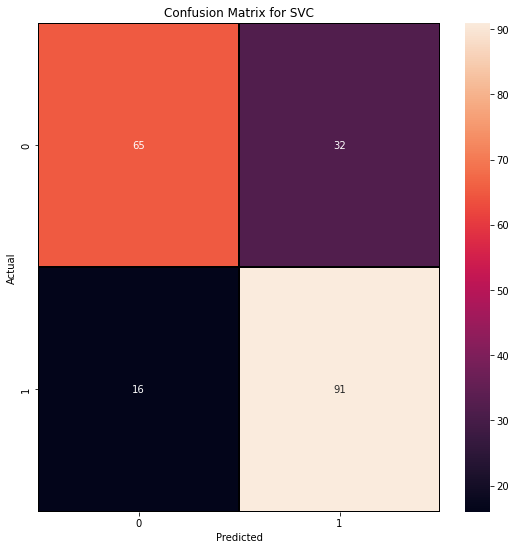

In [75]:
# For checking confusion matrix for SVC:-
CM1= confusion_matrix(y_test,predsv)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM1, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVC")
plt.show()

In [76]:
# For checking Accuracy score with 3rd model: DecisionTreeClassifier:-
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predDTC))
print("Confusion Matrix: ", confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

R2_Score:  0.7892156862745098
Confusion Matrix:  [[77 20]
 [23 84]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        97
           1       0.81      0.79      0.80       107

    accuracy                           0.79       204
   macro avg       0.79      0.79      0.79       204
weighted avg       0.79      0.79      0.79       204



Here, the accuracy score coming is 79%

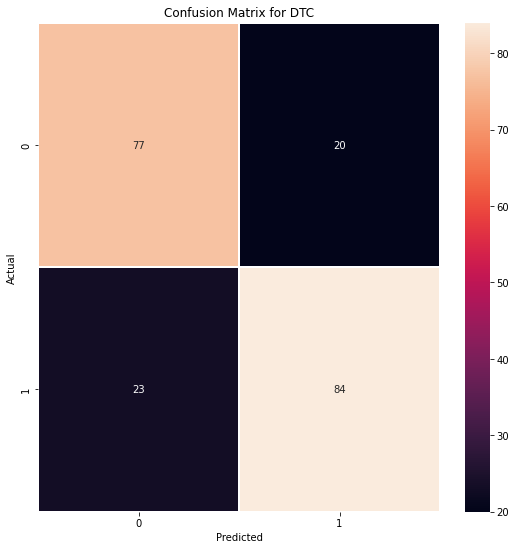

In [77]:
# For checking confusion matrix for DecisionTreeClassifier:-
CM2= confusion_matrix(y_test,predDTC)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM2, annot=True, linewidth=0.2, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for DTC")
plt.show()

In [79]:
# For checking Accuracy score with 4th model: GradientBoostingClassifier:-
Gbc=GradientBoostingClassifier()
Gbc.fit(x_train,y_train)
predGbc=Gbc.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predGbc))
print("Confusion Matrix: ", confusion_matrix(y_test,predGbc))
print(classification_report(y_test,predGbc))

R2_Score:  0.7941176470588235
Confusion Matrix:  [[69 28]
 [14 93]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        97
           1       0.77      0.87      0.82       107

    accuracy                           0.79       204
   macro avg       0.80      0.79      0.79       204
weighted avg       0.80      0.79      0.79       204



Here, it is giving accuracy score of 80%

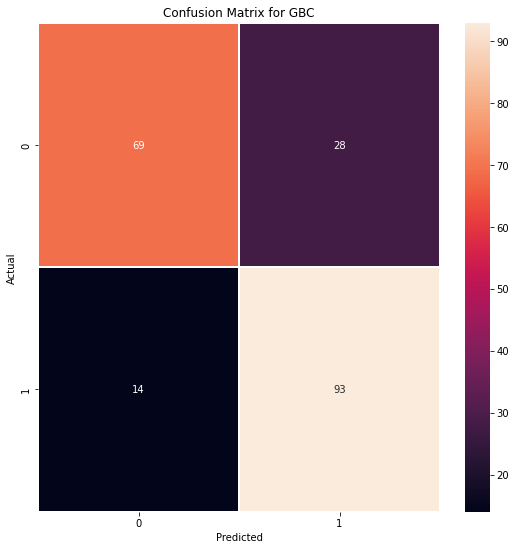

In [81]:
# For Checking confusion Matrix using GradientBoostingClassifier:-
CM3= confusion_matrix(y_test,predGbc)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM3, annot=True, linewidth=0.2, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GBC")
plt.show()

In [82]:
# For Checking Accuracy score with 5th model: RandomForestClassifier:-
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predrfc))
print("Confusion Matrix: ", confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

R2_Score:  0.8578431372549019
Confusion Matrix:  [[78 19]
 [10 97]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        97
           1       0.84      0.91      0.87       107

    accuracy                           0.86       204
   macro avg       0.86      0.86      0.86       204
weighted avg       0.86      0.86      0.86       204



In this, with RandomForestClassifier it is giving highest score of 86 %

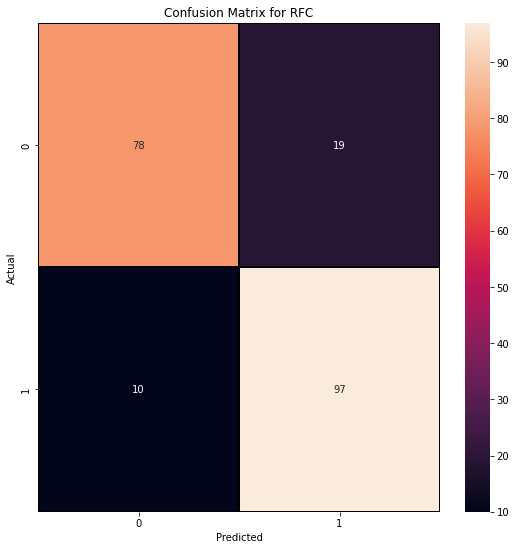

In [83]:
# For checking ConfusionMatrix using RandomForestClassifier:-
CM4= confusion_matrix(y_test,predrfc)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM4, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RFC")
plt.show()

# CROSS- VALIDATION PHASE:-

In [84]:
# For Importing Required libraries for cross validation:-
from sklearn.model_selection import cross_val_score

In [85]:
#  For checking Cv score of KNN Classifier:-
print(cross_val_score(knn,x,y,cv=5).mean())

0.7702643338635158


In [86]:
# For checking Cv score of SVC:-
print(cross_val_score(sv,x,y,cv=5).mean())

0.7518139816708324


In [87]:
# For checking Cv score of DecisionTreeClassifier:-
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7764523214420965


In [88]:
# For checking Cv score of GradientBoostingClassifier:-
print(cross_val_score(Gbc,x,y,cv=5).mean())

0.7924032416874953


In [89]:
# For checking Cv score of RandomForestClassifier:-
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8341967734605772


# HYPER PARAMETER TUNING USING GRIDSEARCH CV:-

In [90]:
# For importing required libraries:-
from sklearn.model_selection import GridSearchCV

In [91]:
parameters = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["sqrt"]}

In [92]:
Gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [93]:
Gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['sqrt'],
                         'n_estimators': [100, 200, 300, 400]})

In [94]:
Gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [105]:
FinalModel=RandomForestClassifier(criterion="entropy", max_depth=25 , max_features="sqrt" ,n_estimators=100)
FinalModel.fit(x_train,y_train)
pred=FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)

In [106]:
print(acc*100)

87.25490196078431


Here, after Hyper parameter tuning the Final score is 87.2%.

# Plotting ROC/AUC CURVE:-

In [107]:
# For importing required libraries and plotting all models on curve:-
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is depreca

<function matplotlib.pyplot.show(close=None, block=None)>

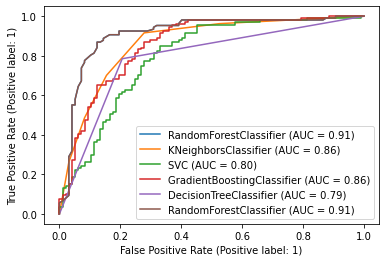

In [109]:
dis=plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=dis.ax_)
plot_roc_curve(sv,x_test,y_test, ax=dis.ax_)
plot_roc_curve(Gbc,x_test,y_test, ax=dis.ax_)
plot_roc_curve(DTC,x_test,y_test, ax=dis.ax_)
plot_roc_curve(rfc,x_test,y_test, ax=dis.ax_)

plt.legend(prop={"size":10}, loc="lower right")
plt.show

Here, the above plot is showing TPR AND FPR

# Saving Model:-

In [110]:
# For importing required libraries and saving the model using pickle:-
import pickle
Name='LoanApplication'
pickle.dump(FinalModel,open(Name,'wb'))

# Loading Model:-

In [112]:
# loading the saved model and fetching the predictions by the model:-
LoadedModel=pickle.load(open('LoanApplication','rb'))
Result=LoadedModel.predict(x_test)
print(Result)

[0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0]


In [113]:
pd.DataFrame([LoadedModel.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
Predicted,0,0,0,1,0,1,0,1,1,1,...,1,0,0,0,1,1,0,0,1,0
Actual,0,0,0,1,0,1,0,1,1,0,...,1,0,0,0,1,1,0,0,0,0
